In [6]:
from random import randint
import matplotlib.pyplot as plt
import time
import math as mth
import numpy as np

In [7]:
def Parent(i):
    return i // 2

def Left(i):
    return 2 * i

def Right(i):
    return 2 * i + 1

# Max Heap:

In [52]:
def Max_Heapify_rec(A, i, heap_size):
    
    i += 1
    l = Left(i)
    r = Right(i)
    largest = i
    
    if l <= heap_size and A[l - 1] > A[largest - 1]:
        largest = l
    if r <= heap_size and A[r - 1] > A[largest - 1]:
        largest = r
    
    if largest != i:
        A[i - 1], A[largest - 1] = A[largest - 1], A[i - 1]
        #print(A)
        Max_Heapify_rec(A, largest - 1)
        
def Max_Heapify_iter(A, i, heap_size):
    
    i += 1
    while i != heap_size:
        l = Left(i)
        r = Right(i)
        largest = i
        stop = 0
        
        if l <= heap_size:
            if A[l - 1] > A[largest - 1]:
                largest = l
        else:
            stop += 1
        
        if r <= heap_size:
            if A[r - 1] > A[largest - 1]:
                largest = r
        else:
            stop += 1
    
        if largest != i and stop != 2:
            A[i - 1], A[largest - 1] = A[largest - 1], A[i - 1]
            #print(A)
            i = largest
        else:
            break

def Build_Max_Heap(A, heap_size):
    for i in list(range(len(A) // 2 - 1, -1, -1)):
        Max_Heapify_iter(A, i, heap_size)

# Min Heap:

In [9]:
def Min_Heapify_rec(A, i, heap_size):
    
    i += 1
    l = Left(i)
    r = Right(i)
    smallest = i
    
    if l <= heap_size and A[l - 1] < A[smallest - 1]:
        smallest = l
    if r <= heap_size and A[r - 1] < A[smallest - 1]:
        smallest = r
    
    if smallest != i:
        A[i - 1], A[smallest - 1] = A[smallest - 1], A[i - 1]
        #print(A)
        Min_Heapify_rec(A, smallest - 1)
        
def Min_Heapify_iter(A, i, heap_size):
    
    i += 1
    while True:
        l = Left(i)
        r = Right(i)
        smallest = i
        stop = 0
        
        if l <= heap_size:
            if A[l - 1] < A[smallest - 1]:
                smallest = l
        else:
            stop += 1
        
        if r <= heap_size:
            if A[r - 1] < A[smallest - 1]:
                smallest = r
        else:
            stop += 1
    
        if smallest != i and stop != 2:
            A[i - 1], A[smallest - 1] = A[smallest - 1], A[i - 1]
            #print(A)
            i = smallest
        else:
            break

def Build_Min_Heap(A, heap_size):
    for i in list(range(len(A) // 2 - 1, -1, -1)):
        Min_Heapify_iter(A, i, heap_size)

# Heapsort:

In [10]:
def Heapsort(A, ascending = True):
    
    # Ascending order
    if ascending == True:
        Build_Max_Heap(A, len(A))
        for i in range(len(A) - 1, 0, -1):
            A[i], A[0] = A[0], A[i]
            Max_Heapify_iter(A, 0, i)
            
    #Descending order
    else:
        Build_Min_Heap(A, len(A))
        for i in range(len(A) - 1, 0, -1):
            A[i], A[0] = A[0], A[i]
            Min_Heapify_iter(A, 0, i)

# Examples:

In [15]:
a = [5, 3, 17, 10, 84, 19, 6, 22, 9]
a

[5, 3, 17, 10, 84, 19, 6, 22, 9]

In [12]:
Heapsort(a)
a

[3, 5, 6, 9, 10, 17, 19, 22, 84]

In [13]:
Heapsort(a, ascending = 0)
a

[84, 22, 19, 17, 10, 9, 6, 5, 3]

# Algorithms comparing:

In [46]:
N = 1000
t1 = []
t2 = []
tt = time.time()
for n in range(1, N + 1):
    
    array = list(reversed(range(n)))
    
    #1
    start_time = time.time()
    Heapsort(array)
    time_1 = time.time() - start_time
    
    #2
    start_time = time.time()
    Merge_Sort(array, 0, n - 1)
    time_2 = time.time() - start_time
    
    
    t1.append(time_1)
    t2.append(time_2)

print("--- %s seconds ---" % (time.time() - tt))

--- 27.171300411224365 seconds ---


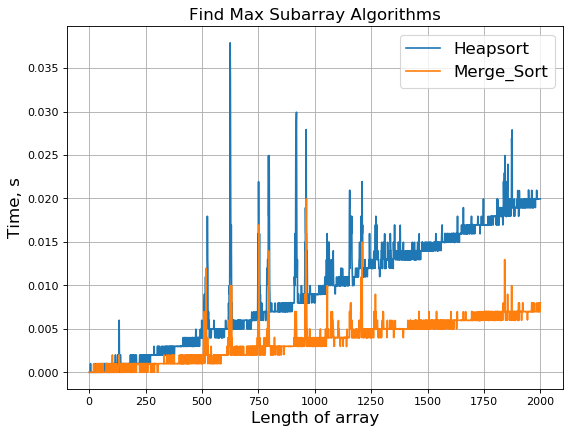

In [51]:
plt.figure(num=None, figsize = (8, 6), dpi = 80)

p1 = plt.plot(range(1, N + 1), t1)
p2 = plt.plot(range(1, N + 1), t2)

plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)


plt.grid()
plt.legend((p1[0], p2[0]),('Heapsort', 'Merge_Sort'), fontsize = 15)
plt.show()

## HEAPSORT is the slowest of the sorting algorithms but unlike merge and quick sort it does not require massive recursion or multiple arrays to work. Merge Sort: The merge sort is slightly faster than the heap sort for larger sets, but it requires twice the memory of the heap sort because of the second array.

# Merge Sort:

In [40]:
def Merge(A, p, q, r):
    
    global inv
    
    L = A[p:q + 1]
    R = A[q + 1:r + 1]
    
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
            if i >= len(L):
                A[k + 1: r + 1] = R[j:]
                break
        else:
            A[k] = R[j]
            inv += j
            j += 1
            if j >= len(R):
                inv += len(R) * (len(L) - i)
                A[k + 1: r + 1] = L[i:]
                break

def Merge_Sort(A, p, r):
    inv = 0
    if p < r:
        q = (p + r) // 2
        Merge_Sort(A, p, q)
        Merge_Sort(A, q + 1, r)
        Merge(A, p, q, r)